The Steepest Descents method simply uses the search direction $s = −g$.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

def bedpan_function(x, y):
    return x + y + (x**2 / 4) - y**2 + (y**2 - x / 2)**2

def bedpan_gradient(x, y):
    df_dx = 1 + x / 2 - (y**2 - x / 2)
    df_dy = 1 - 2 * y + 2 * (y**2 - x / 2) * (2 * y)
    return np.array([df_dx, df_dy])

def rosenbrock_like_function(x, y):
    return (1 - x)**2 + 80 * (y - x**2)**2

def rosenbrock_like_gradient(x, y):
    df_dx = -2 * (1 - x) - 320 * x * (y - x**2)
    df_dy = 160 * (y - x**2)
    return np.array([df_dx, df_dy])

In [14]:
def steepest_descent_colab(func, grad_func, x0, num_iterations=10):
    '''
    Performs the steepest descents algorithm.
    '''
    points_history = [x0]
    f_history = [func(x0[0], x0[1])]
    x_current = np.array(x0, dtype=float)

    print(f"Starting at x_0 = {x_current}, f(x_0) = {f_history[0]:.6f}")

    for i in range(num_iterations):
        g = grad_func(x_current[0], x_current[1])
        s = -g

        phi = lambda lam: func(x_current[0] + lam * s[0], x_current[1] + lam * s[1])

        lambda_vals = np.linspace(0, 0.1, 400)
        phi_vals = [phi(l) for l in lambda_vals]

        plt.figure(figsize=(6, 4))
        plt.plot(lambda_vals, phi_vals)
        plt.title(f"Iteration {i+1}: Plot of $\\phi(\\lambda)$")
        plt.xlabel(f"$\\lambda$ (Step Size)")
        plt.ylabel(f"$\\phi(\\lambda) = f({x_current} + \\lambda s)$")
        plt.grid(True)
        plt.show()
        time.sleep(1)

        while True:
            try:
                lambda_star_str = input(
                    f"Examine the plot above. Enter the value of λ* for iteration {i+1}: \n"
                )
                lambda_star = float(lambda_star_str)
                break
            except ValueError:
                print("Invalid input. Please enter a number.\n")

        x_next = x_current + lambda_star * s
        points_history.append(x_next)

        f_current = f_history[-1]
        f_next = func(x_next[0], x_next[1])
        f_history.append(f_next)

        decrease = f_current - f_next

        print(f"\nIteration {i+1}:")
        print(f"  Selected λ* = {lambda_star}")
        print(f"  Current Value f(x_{i+1}) = {f_next:.6f}")
        print(f"  Decrease from last step = {decrease:.6f}")
        x_current = x_next
    return np.array(points_history), np.array(f_history)

def plot_optimization_path(func, points_history, f_values, title):
    '''
    Plots the optimization path on a contour plot of the function with
    custom levels for better detail near the minimum.
    '''
    x_coords = points_history[:, 0]
    y_coords = points_history[:, 1]

    x_buffer = (max(x_coords) - min(x_coords)) * 0.2 or 1.0
    y_buffer = (max(y_coords) - min(y_coords)) * 0.2 or 1.0

    x_range = np.linspace(min(x_coords) - x_buffer, max(x_coords) + x_buffer, 400)
    y_range = np.linspace(min(y_coords) - y_buffer, max(y_coords) + y_buffer, 400)
    X, Y = np.meshgrid(x_range, y_range)
    Z = func(X, Y)

    plt.figure(figsize=(10, 8))

    min_f_val = f_values[-1]
    fine_levels = np.linspace(min_f_val, min_f_val + 0.5, 20)
    coarse_levels = np.logspace(0, 3, 20)
    custom_levels = np.sort(np.concatenate([fine_levels, coarse_levels]))

    plt.contour(X, Y, Z, levels=custom_levels, cmap='viridis')

    plt.plot(x_coords, y_coords, 'r-o', label='Iteration Path')
    plt.plot(x_coords[0], y_coords[0], 'go', markersize=10, label='Start Point')
    plt.plot(x_coords[-1], y_coords[-1], 'bo', markersize=10, label='End Point')

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.colorbar(label='f(x, y)')
    plt.show()

Starting at x_0 = [-1.  -1.3], f(x_0) = 1.056100


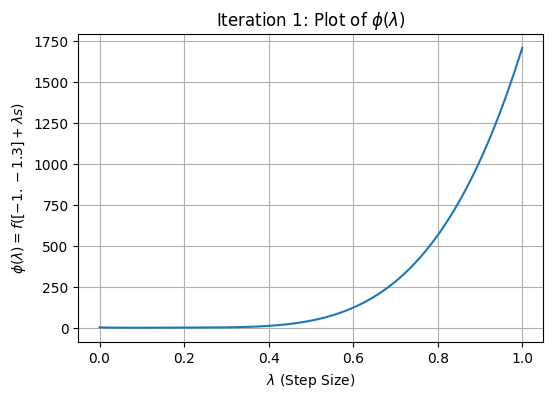

Examine the plot above. Enter the value of λ* for iteration 1: 
0.1

Iteration 1:
  Selected λ* = 0.1
  Current Value f(x_1) = -0.979035
  Decrease from last step = 2.035135


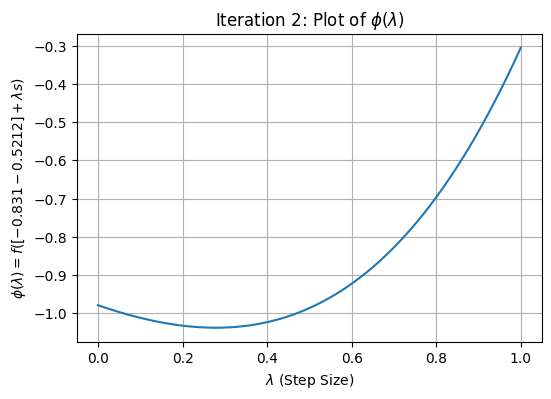

Examine the plot above. Enter the value of λ* for iteration 2: 
0.3

Iteration 2:
  Selected λ* = 0.3
  Current Value f(x_2) = -1.037410
  Decrease from last step = 0.058375


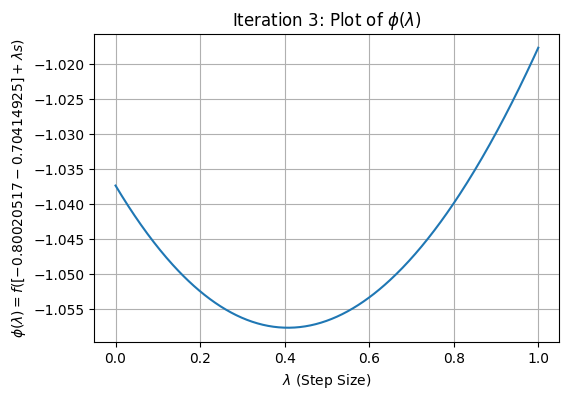

Examine the plot above. Enter the value of λ* for iteration 3: 
0.4

Iteration 3:
  Selected λ* = 0.4
  Current Value f(x_3) = -1.057709
  Decrease from last step = 0.020299


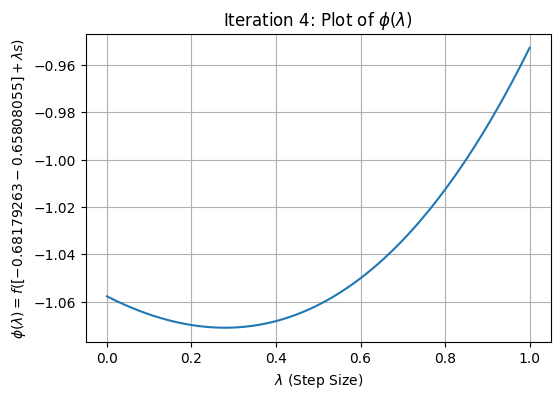

Examine the plot above. Enter the value of λ* for iteration 4: 
0.3

Iteration 4:
  Selected λ* = 0.3
  Current Value f(x_4) = -1.070888
  Decrease from last step = 0.013178


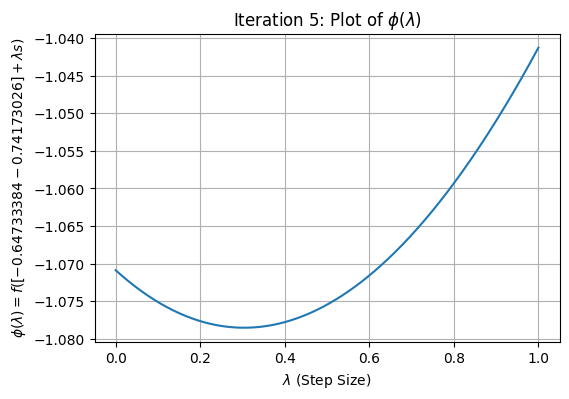

Examine the plot above. Enter the value of λ* for iteration 5: 
0.3

Iteration 5:
  Selected λ* = 0.3
  Current Value f(x_5) = -1.078536
  Decrease from last step = 0.007648


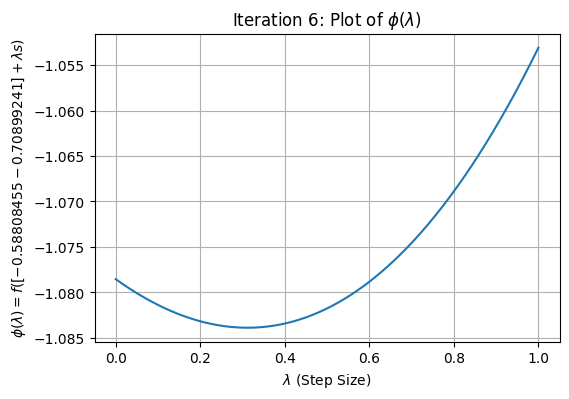

Examine the plot above. Enter the value of λ* for iteration 6: 
0.3

Iteration 6:
  Selected λ* = 0.3
  Current Value f(x_6) = -1.083873
  Decrease from last step = 0.005337


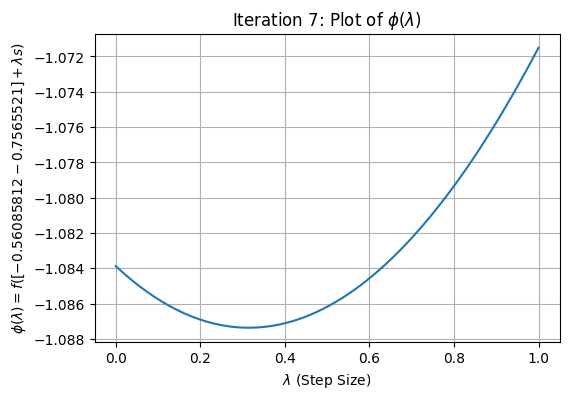

Examine the plot above. Enter the value of λ* for iteration 7: 
0.3

Iteration 7:
  Selected λ* = 0.3
  Current Value f(x_7) = -1.087353
  Decrease from last step = 0.003480


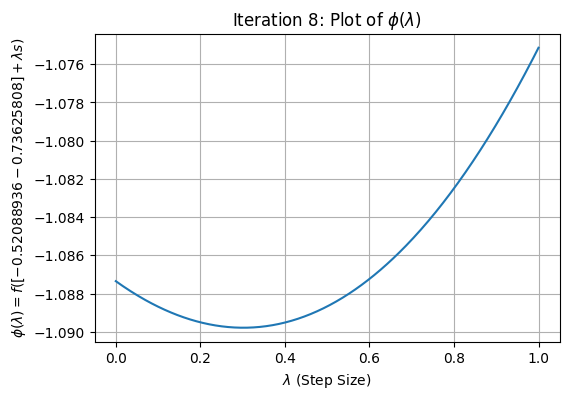

Examine the plot above. Enter the value of λ* for iteration 8: 
0.3

Iteration 8:
  Selected λ* = 0.3
  Current Value f(x_8) = -1.089789
  Decrease from last step = 0.002437


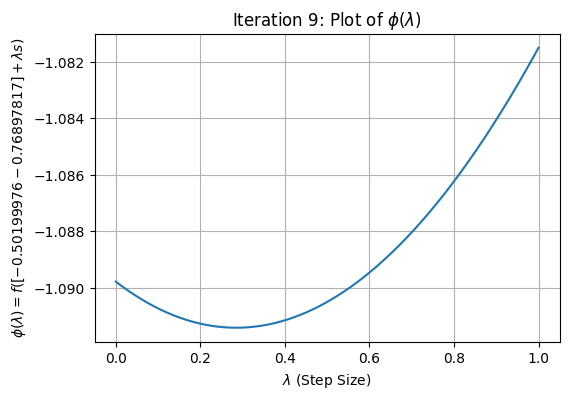

Examine the plot above. Enter the value of λ* for iteration 9: 
0.3

Iteration 9:
  Selected λ* = 0.3
  Current Value f(x_9) = -1.091417
  Decrease from last step = 0.001628


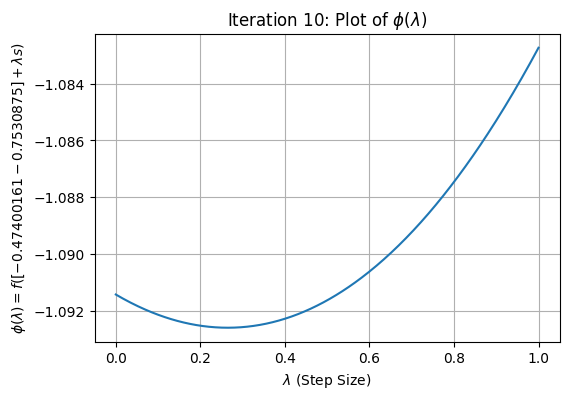

Examine the plot above. Enter the value of λ* for iteration 10: 
0.3

Iteration 10:
  Selected λ* = 0.3
  Current Value f(x_10) = -1.092564
  Decrease from last step = 0.001147

--- Summary of Results ---
Iteration 0: x = (-1.000000, -1.300000), f(x) = 1.056100
Iteration 1: x = (-0.831000, -0.521200), f(x) = -0.979035
Iteration 2: x = (-0.800205, -0.704149), f(x) = -1.037410
Iteration 3: x = (-0.681793, -0.658081), f(x) = -1.057709
Iteration 4: x = (-0.647334, -0.741730), f(x) = -1.070888
Iteration 5: x = (-0.588085, -0.708992), f(x) = -1.078536
Iteration 6: x = (-0.560858, -0.756552), f(x) = -1.083873
Iteration 7: x = (-0.520889, -0.736258), f(x) = -1.087353
Iteration 8: x = (-0.502000, -0.768978), f(x) = -1.089789
Iteration 9: x = (-0.474002, -0.753088), f(x) = -1.091417
Iteration 10: x = (-0.461659, -0.778233), f(x) = -1.092564


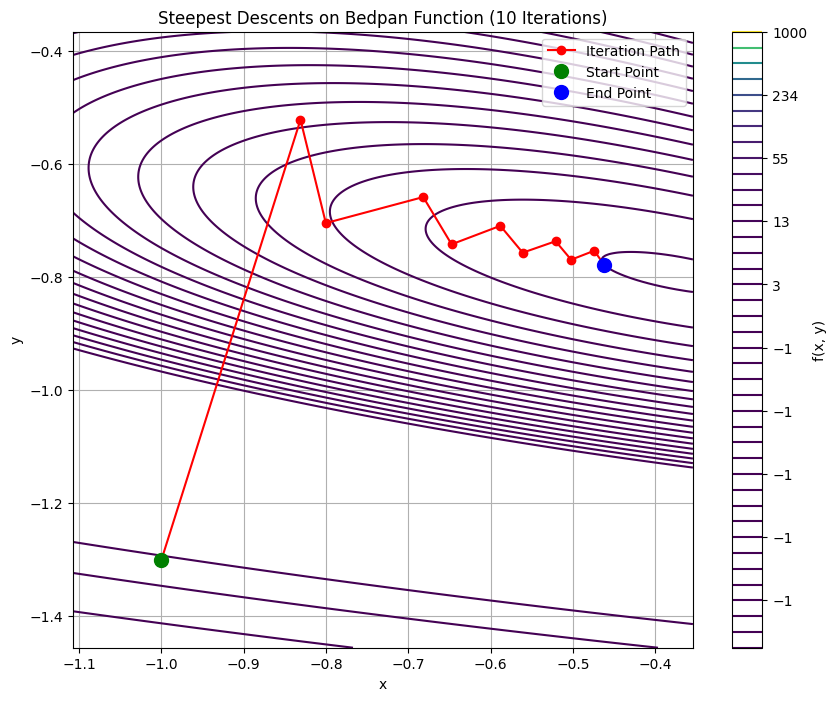

In [15]:
initial_point = np.array([-1.0, -1.3])
num_iterations = 10

path_history, f_values = steepest_descent_colab(
    bedpan_function,
    bedpan_gradient,
    initial_point,
    num_iterations
)

print("\n--- Summary of Results ---")
for i, (point, f_val) in enumerate(zip(path_history, f_values)):
    print(f"Iteration {i}: x = ({point[0]:.6f}, {point[1]:.6f}), f(x) = {f_val:.6f}")
plot_optimization_path(
    bedpan_function,
    path_history,
    f_values,
    "Steepest Descents on Bedpan Function (10 Iterations)"
)

The minimum value of the function can be found with much higher precision than the point where the minimum occurs. This effect is caused by the flatness of the function near its minimum. When the surface of the function is very flat, a large change in the $(x, y)$ coordinates results in a very small change in the function's value.

The gradient in this flat region is very close to zero, causing the steepest descents method to take very small steps, a phenomenon often called "zigzagging" or "crawling." Because the function is so insensitive to changes in position near the minimum, it is easy to find a value close to the minimum, but it is much harder to pinpoint the exact location of the minimum itself.

Starting at x_0 = [0.676 0.443], f(x_0) = 0.120602


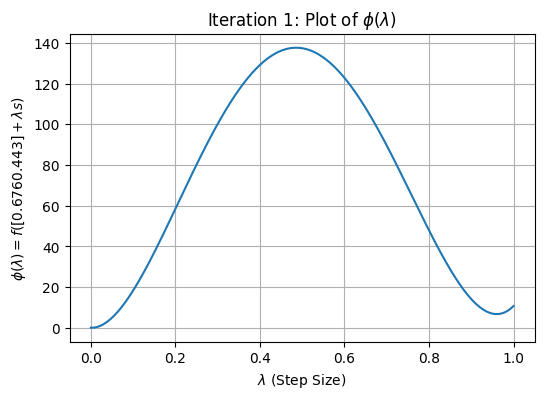

Examine the plot above. Enter the value of λ* for iteration 1: 
0.01

Iteration 1:
  Selected λ* = 0.01
  Current Value f(x_1) = 0.248518
  Decrease from last step = -0.127916


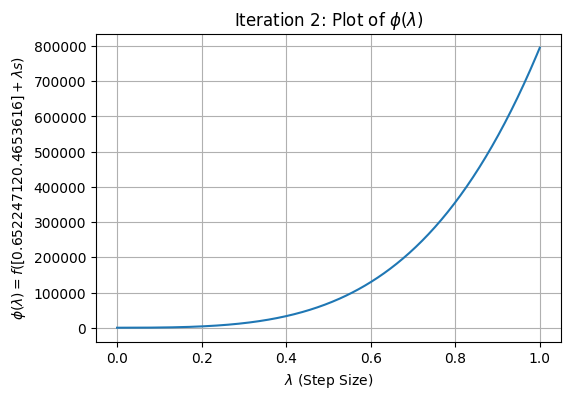

Examine the plot above. Enter the value of λ* for iteration 2: 
0.01

Iteration 2:
  Selected λ* = 0.01
  Current Value f(x_2) = 1.864417
  Decrease from last step = -1.615899


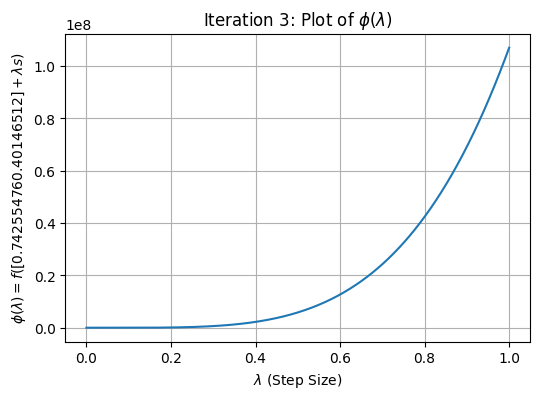

Examine the plot above. Enter the value of λ* for iteration 3: 
0.01

Iteration 3:
  Selected λ* = 0.01
  Current Value f(x_3) = 19.429556
  Decrease from last step = -17.565138


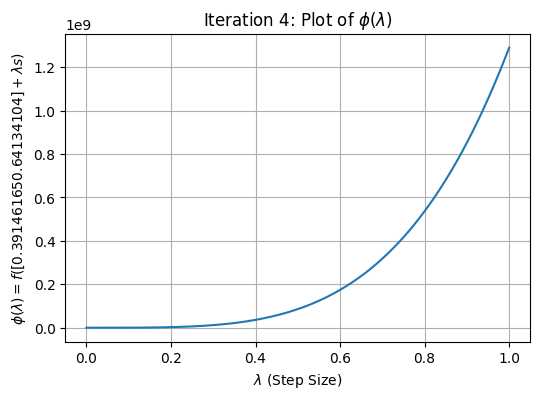

Examine the plot above. Enter the value of λ* for iteration 4: 
0.01

Iteration 4:
  Selected λ* = 0.01
  Current Value f(x_4) = 109.506498
  Decrease from last step = -90.076942


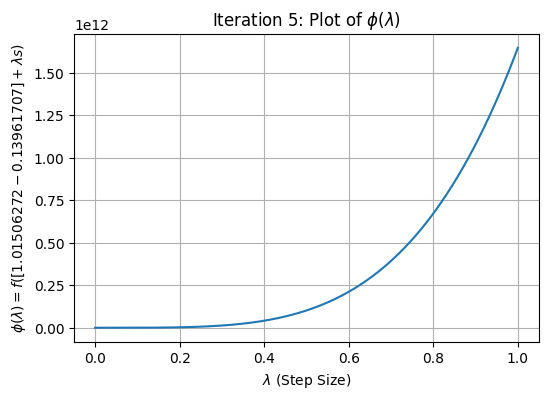

Examine the plot above. Enter the value of λ* for iteration 5: 
0.0001

Iteration 5:
  Selected λ* = 0.0001
  Current Value f(x_5) = 92.542992
  Decrease from last step = 16.963505


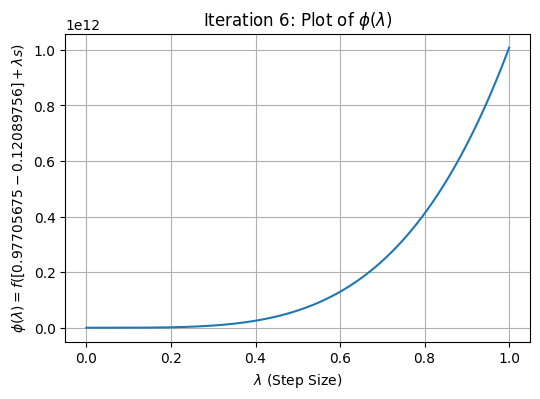

Examine the plot above. Enter the value of λ* for iteration 6: 
0.00001

Iteration 6:
  Selected λ* = 1e-05
  Current Value f(x_6) = 91.123794
  Decrease from last step = 1.419199


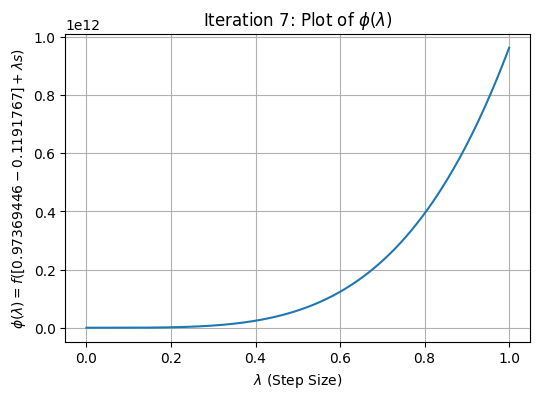

Examine the plot above. Enter the value of λ* for iteration 7: 
0.0001

Iteration 7:
  Selected λ* = 0.0001
  Current Value f(x_7) = 77.864284
  Decrease from last step = 13.259510


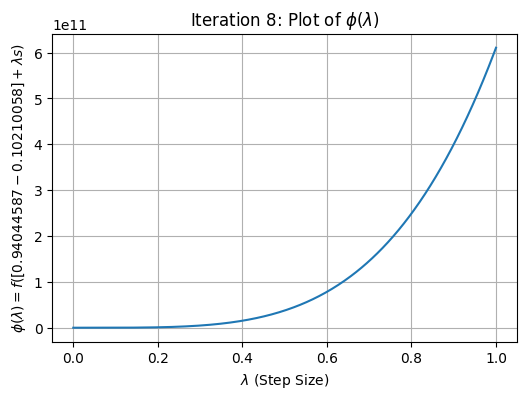

Examine the plot above. Enter the value of λ* for iteration 8: 
0.001

Iteration 8:
  Selected λ* = 0.001
  Current Value f(x_8) = 10.412743
  Decrease from last step = 67.451541


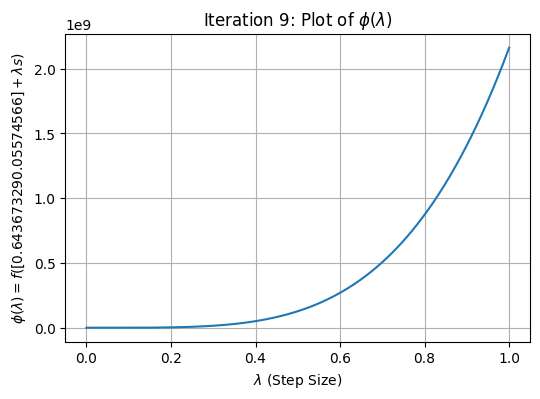

Examine the plot above. Enter the value of λ* for iteration 9: 
0.001

Iteration 9:
  Selected λ* = 0.001
  Current Value f(x_9) = 3.793104
  Decrease from last step = 6.619640


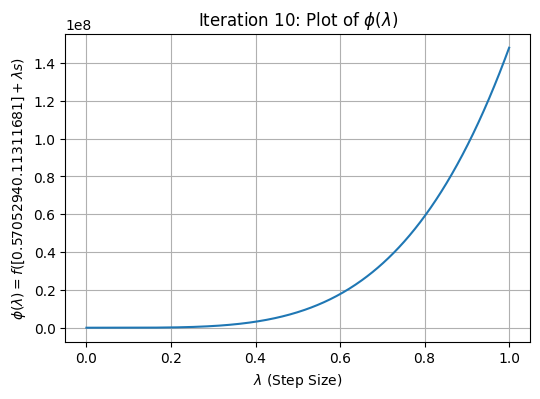

Examine the plot above. Enter the value of λ* for iteration 10: 
0.01

Iteration 10:
  Selected λ* = 0.01
  Current Value f(x_10) = 14.519369
  Decrease from last step = -10.726265

--- Summary of Results ---
Iteration 0: Point = (0.676000, 0.443000), f(x) = 0.120602
Iteration 1: Point = (0.652247, 0.465362), f(x) = 0.248518
Iteration 2: Point = (0.742555, 0.401465), f(x) = 1.864417
Iteration 3: Point = (0.391462, 0.641341), f(x) = 19.429556
Iteration 4: Point = (1.015063, -0.139617), f(x) = 109.506498
Iteration 5: Point = (0.977057, -0.120898), f(x) = 92.542992
Iteration 6: Point = (0.973694, -0.119177), f(x) = 91.123794
Iteration 7: Point = (0.940446, -0.102101), f(x) = 77.864284
Iteration 8: Point = (0.643673, 0.055746), f(x) = 10.412743
Iteration 9: Point = (0.570529, 0.113117), f(x) = 3.793104
Iteration 10: Point = (0.191365, 0.452936), f(x) = 14.519369


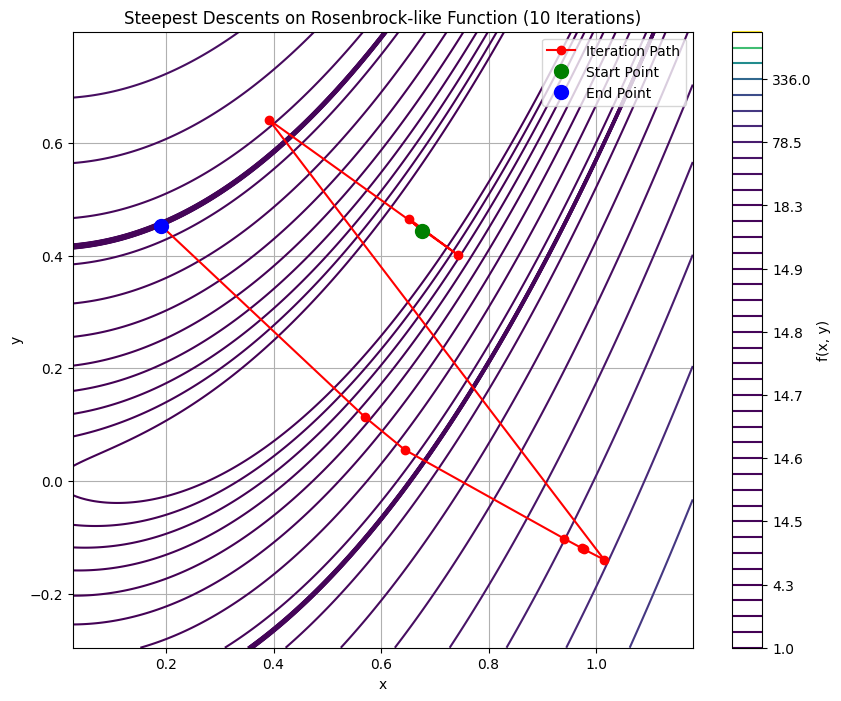

In [19]:
initial_point = np.array([0.676, 0.443])
num_iterations = 10

path_history, f_values = steepest_descent_colab(
    rosenbrock_like_function,
    rosenbrock_like_gradient,
    initial_point,
    num_iterations
)

print("\n--- Summary of Results ---")
for i, (point, f_val) in enumerate(zip(path_history, f_values)):
    print(f"Iteration {i}: Point = ({point[0]:.6f}, {point[1]:.6f}), f(x) = {f_val:.6f}")
plot_optimization_path(
    rosenbrock_like_function,
    path_history,
    f_values,
    "Steepest Descents on Rosenbrock-like Function (10 Iterations)"
)

The rate of convergence is extremely slow. The initial few steps make good progress in reducing the function's value by moving the point into the valley. However, once inside the valley, the algorithm takes many small, inefficient steps. The decrease in the function value per iteration becomes very small. This is a classic example of linear convergence, but with a very poor convergence ratio.

The iteration path is highly sensitive to variations in the choice of $\lambda^*$ at each stage.

*   If $\lambda^*$ is chosen to be slightly too small, then the step will fall short, and the next gradient will still point sharply across the valley, leading to another inefficient zigzag.
*   If $\lambda^*$ is chosen to be slightly too large, the step will overshoot the lowest point in the line search, landing higher up on the opposite wall of the valley. This can be even worse, as it may lead to a larger function value and significantly slow down or even stall progress.

Because the valley is so narrow, the optimal $\lambda^*$ lies in a very small range. This makes the manual selection process difficult and highlights a weakness of methods that rely on exact line searches in such terrains.

The primary circumstance that makes steepest descents inefficient is when the function's geometry features long, narrow, and high-curvature ravines.
This inefficiency arises because the gradient direction is misleading. The direction of steepest descent (the negative gradient) is perpendicular to the contour lines. In a narrow valley, the contour lines are elongated and close together.

This means the gradient points almost perpendicularly across the valley, not along the valley toward the minimum. The algorithm makes a step across the valley. At the new point, the gradient again points back across the valley. This process repeats, causing the algorithm to take a large number of small, zigzagging steps to make slow progress along the valley floor.

Mathematically, this corresponds to the Hessian matrix of the function being ill-conditioned (having a large ratio between its largest and smallest eigenvalues). This indicates that the function is highly curved in one direction (across the valley) but very flat in another (along the valley), which is the root cause of the problem.